# 0.4_matrix

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%load_ext blackcellmagic

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger()
logger.setLevel(logging.INFO)


def nrows(n):
    pd.options.display.max_rows = n


nrows(5)
from tqdm import tqdm

import itertools
from coding_the_matrix.Vec import Vec
from coding_the_matrix.Mat import Mat
from coding_the_matrix.matutil import (
    listlist2mat,
    value,
    keys,
    coldict2mat,
    rowdict2mat,
    mat2rowdict,
    mat2coldict,
)
from coding_the_matrix.vecutil import *
from coding_the_matrix.GF2 import *
from coding_the_matrix.solve import solve
from coding_the_matrix.bitutil import str2bits, bits2str, bits2mat, mat2bits, noise
from coding_the_matrix.image_mat_util import (
    four_corners,
    corners_to_list,
    rgb_to_hex,
    mat2im,
    fig2arr,
    fig_size,
    array_to_dict,
    im2colors,
    im2mat,
    fig_max,
    identity,
    translation,
    scale,
    rotation,
    rotation_about,
    reflect_x,
    reflect_y,
    scale_color,
    show,
    grayscale,
)
from coding_the_matrix._image_mat_util import file2mat

from PIL import Image

In [53]:
from coding_the_matrix.matutil import lin_comb_mat_vec_mul
from coding_the_matrix import vecutil

## More operations

In [18]:
def metal_gnome_matrix():
    D_list = ["metal", "concrete", "plastic", "water", "electricity"]
    D = set(D_list) 
    v_gnome = Vec(
        D, {"concrete": 1.3, "plastic": 0.2, "water": 0.8, "electricity": 0.4}
    )
    v_hoop = Vec(D, {"plastic": 1.5, "water": 0.4, "electricity": 0.3})
    v_slinky = Vec(D, {"metal": 0.25, "water": 0.2, "electricity": 0.7})
    v_putty = Vec(D, {"plastic": 0.3, "water": 0.7, "electricity": 0.5})
    v_shooter = Vec(
        D, {"metal": 0.15, "plastic": 0.5, "water": 0.4, "electricity": 0.8}
    )
    rowdict = {
        "gnome": v_gnome,
        "hoop": v_hoop,
        "slinky": v_slinky,
        "putty": v_putty,
        "shooter": v_shooter,
    }
    #
    M = matutil.rowdict2mat(rowdict, col_labels=D_list)
    return M

In [16]:
def metal_vector():
    b = Vec(
        {"metal", "concrete", "water", "electricity", "plastic"},
        {
            "metal": 51.0,
            "concrete": 312.0,
            "water": 373.1,
            "electricity": 356.0,
            "plastic": 215.4,
        },
    )
    return b

In [41]:
def gnome_vector():
    v = Vec(
        {"gnome", "hoop", "putty", "shooter", "slinky"},
        {
            "gnome": 1,
            "hoop": 2,
            "slinky": 3,
            "putty": 4,
            "shooter": 5,
        },
    )
    return v

In [19]:
M = metal_gnome_matrix()
print(M)

         metal  concrete  plastic  water  electricity
gnome     0.00       1.3      0.2    0.8          0.4
hoop      0.00       0.0      1.5    0.4          0.3
slinky    0.25       0.0      0.0    0.2          0.7
putty     0.00       0.0      0.3    0.7          0.5
shooter   0.15       0.0      0.5    0.4          0.8


In [42]:
v = gnome_vector()
print(v)

 gnome  hoop  slinky  putty  shooter
     1     2       3      4        5


In [46]:
lin_comb_mat_vec_mult(M.transpose(), v)

Vec(self.D, {'metal': 1.5, 'concrete': 1.3, 'electricity': 9.1, 'water': 7.0, 'plastic': 6.9})

In [ ]:
def lin_comb_mat_vec_mul(M, v):
    """M*v, using linear-combination definition
    v[k] is the only operation allowed on v.
    Use the linear combination definition.

    Args:
        M: matrix
        v: vector
    """
    R, C = M.D
    assert v.D == C
    result = vecutil.zero_vec(R)
    for col in C:
        m_col = Vec.Vec(R, {r: M[(r, col)] for r in R})
        result += m_col * v[col]
    return result

In [56]:
def lin_comb_vec_mat_mul(v, M):
    """linear combination version of v*M
    """
    R, C = M.D
    assert v.D == R
    result = vecutil.zero_vec(C)
    for row in R:
        r_col = Vec.Vec(C, {c: M[(row, c)] for c in C})
        result += r_col * v[row]
    return result

In [64]:
answer = lin_comb_vec_mat_mul(v, M)
answer

Vec(self.D, {'metal': 1.5, 'concrete': 1.3, 'electricity': 9.1, 'water': 7.0, 'plastic': 6.9})

In [62]:
def dot_product_mat_vec_mul(M, v):
    """Dot product version of M *v
    RxC * C = Rx1
    """
    R, C = M.D
    assert v.D == C
    return Vec(R, {r: sum(M[(r, c)] * v[c] for c in C) for r in R})

In [65]:
dot_product_mat_vec_mul(M.transpose(), v) == answer

True

## Original module

In [3]:
org_loc, org_col = file2mat('image.png')

In [4]:
org_loc.shape

(3, 25)

In [5]:
org_col.shape

(3, 16)

In [6]:
mat2im(org_col, org_loc)

## Inverse problem　
- image to matrix
- ah, this isn't possible
- nope, it should be

In [7]:
image = Image.open('im_big.png')

In [8]:
image

In [9]:
im = np.array(image)

In [10]:
im.shape

(24, 24, 3)

In [11]:
colors, locations = im2mat(im)

In [45]:
round(32.0)

32

In [49]:
round(np.float(32.0))

32

In [46]:
round(np.float64(32.0))

32.0

### Get the location matrix (identity?)

In [12]:
identity() * locations == locations

True

In [13]:
locations2 = translation(1, 2) * locations 

array(<matplotlib.image.AxesImage object at 0x11f907c40>, dtype=object)

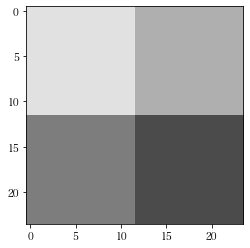

In [68]:
np.array(show(colors, locations))

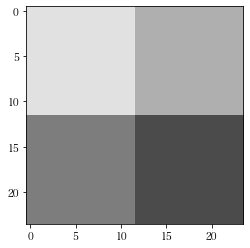

In [60]:
show(colors, locations, col_mat=grayscale())

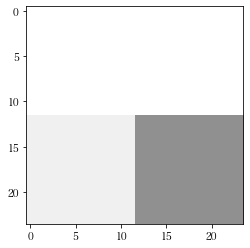

In [57]:
show(colors, locations, col_mat=[grayscale(), scale_color(1, 2, 4)])

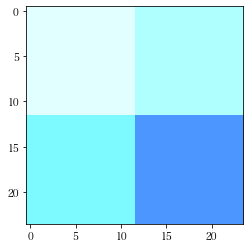

In [58]:
show(colors, locations, col_mat=[scale_color(1, 2, 4), grayscale()])

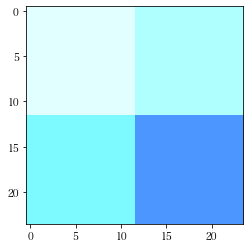

In [26]:
show(colors, locations, col_mat=scale_color(1, 2, 4))

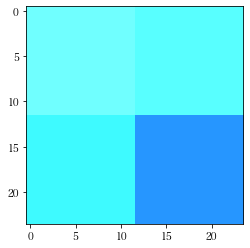

In [43]:
show(colors, locations, col_mat=scale_color(1/2, 2, 12))

In [ ]:
show(colors, locations, col_mat=scale_color(1/2, 2, 12))

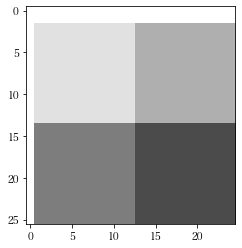

In [32]:
show(translation(1, 2))

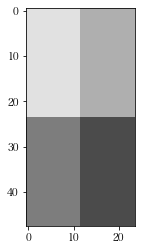

In [33]:
show(scale(1, 2))

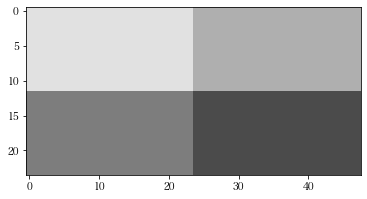

In [34]:
show(scale(2, 1))

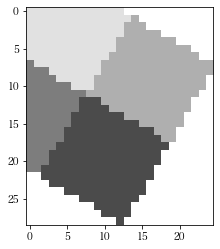

In [83]:
show(rotation_about(np.pi/6, 10, 5))

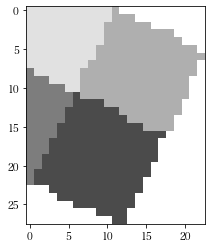

In [94]:
show(rotation_about(np.pi/7, 10, 0))

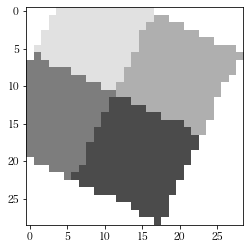

In [95]:
show(rotation_about(np.pi/7, 12, 12))

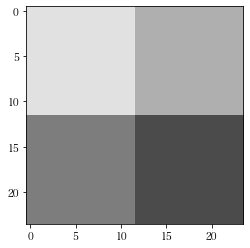

In [96]:
show()

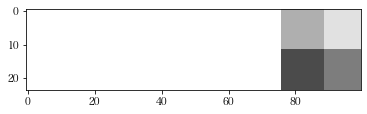

In [97]:
show(translation(100, 0) * reflection())

In [71]:
np.arctan(1/3)

0.3217505543966422

In [72]:
np.arctan(1)

0.7853981633974483

In [73]:
np.arctan(np.inf)

1.5707963267948966

In [74]:
np.arctan2(1, 0)

1.5707963267948966

In [75]:
np.arctan2(-1, 0)

-1.5707963267948966

In [ ]:
np.arctan(1/3)

In [36]:
rot = rotation(np.pi)

In [38]:
print(rot)

              x             y  u
x -1.000000e+00 -1.224647e-16  0
y  1.224647e-16 -1.000000e+00  0
u  0.000000e+00  0.000000e+00  1


In [66]:
rotated = rot * locations

In [73]:
vec = value(mat2coldict(rotated))

In [80]:
if not any(vec['x'] > 0 and vec['y'] > 0 for vec in mat2coldict(rotated).values()):
    raise RuntimeError("All values are minus, need at least one to print. Consider translation(+x, +y)")

RuntimeError: All values are minus, need at least one to print. Consider translation(+x, +y)

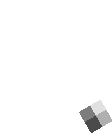

In [54]:
mat2im(colors, translation(100, 100) * rotation (np.pi/3) *locations)

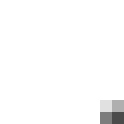

In [52]:
mat2im(colors, translation(100, 100) * rotation (0) *locations)

In [ ]:
plt.imshow(mat2im(colors, translation(1, 2) * locations))

In [144]:
all_locations = [
    locations,
    locations2,
]

In [153]:
canvas = Image.new(
    mode="RGB",
    size=tuple(fig_max(all_locations)),
    color="white",
)

In [154]:
canvas

In [155]:
mat2im(colors, locations, canvas)
mat2im(colors, locations2, canvas)

In [87]:
fig_max(all_locations)

dict_values([5, 6])

In [41]:
im2 = mat2im(colors, translation(1, 2) * locations)

In [45]:
np.array(im2).shape

(24, 24, 3)

In [31]:
mat2im(colors, locations)

In [46]:
locations2 = translation(1, 2) * locations

In [47]:
print(locations2)

   (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (1, 0)  (1, 1)  (1, 2)  (1, 3)  (1, 4)  (2, 0)  (2, 1)  (2, 2)  (2, 3)  (2, 4)  (3, 0)  (3, 1)  (3, 2)  (3, 3)  (3, 4)  (4, 0)  (4, 1)  (4, 2)  (4, 3)  (4, 4)
y       2       3       4       5       6       2       3       4       5       6       2       3       4       5       6       2       3       4       5       6       2       3       4       5       6
x       1       1       1       1       1       2       2       2       2       2       3       3       3       3       3       4       4       4       4       4       5       5       5       5       5
u       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1


In [32]:
mat2im(colors, translation(1, 2) * locations)

In [39]:
print(translation(1, 2) * locations)

   (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (1, 0)  (1, 1)  (1, 2)  (1, 3)  (1, 4)  (2, 0)  (2, 1)  (2, 2)  (2, 3)  (2, 4)  (3, 0)  (3, 1)  (3, 2)  (3, 3)  (3, 4)  (4, 0)  (4, 1)  (4, 2)  (4, 3)  (4, 4)
y       2       3       4       5       6       2       3       4       5       6       2       3       4       5       6       2       3       4       5       6       2       3       4       5       6
x       1       1       1       1       1       2       2       2       2       2       3       3       3       3       3       4       4       4       4       4       5       5       5       5       5
u       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1


In [65]:
rowdict2mat?

Signature: rowdict2mat(rowdict, col_labels=None)
Docstring:
Given a dictionary or list whose values are Vecs, returns the Mat having these
Vecs as its rows.  This is the inverse of mat2rowdict.
Assumes all the Vecs have the same label-set.
Assumes row_dict is nonempty.
If rowdict is a dictionary then its keys will be the row-labels of the Mat.
If rowdict is a list then {0...len(rowdict)-1} will be the row-labels of the Mat.
e.g.:

>>> A = {0:Vec.Vec({0,1},{0:1,1:2}),1:Vec.Vec({0,1},{0:3,1:4})}
>>> B = [Vec.Vec({0,1},{0:1,1:2}),Vec.Vec({0,1},{0:3,1:4})]
>>> mat2rowdict(rowdict2mat(A)) == A
True
>>> rowdict2mat(A)
Mat(({0, 1}, {0, 1}), {(0, 1): 2, (1, 0): 3, (0, 0): 1, (1, 1): 4})
>>> rowdict2mat(A) == rowdict2mat(B)
True
File:      ~/github.com/banbiossa/coding-the-matrix/coding_the_matrix/matutil.py
Type:      function


In [64]:
Vec?

Init signature: Vec(domain: set, function: dict)
Docstring:      <no docstring>
Init docstring: A vector is a function f from domain D to a field
File:           ~/github.com/banbiossa/coding-the-matrix/coding_the_matrix/Vec.py
Type:           type
Subclasses:     


In [61]:
print(locations)

   (0, 0)  (0, 1)  (0, 2)  (0, 3)  (0, 4)  (1, 0)  (1, 1)  (1, 2)  (1, 3)  (1, 4)  (2, 0)  (2, 1)  (2, 2)  (2, 3)  (2, 4)  (3, 0)  (3, 1)  (3, 2)  (3, 3)  (3, 4)  (4, 0)  (4, 1)  (4, 2)  (4, 3)  (4, 4)
x       0       0       0       0       0       1       1       1       1       1       2       2       2       2       2       3       3       3       3       3       4       4       4       4       4
y       0       1       2       3       4       0       1       2       3       4       0       1       2       3       4       0       1       2       3       4       0       1       2       3       4
u       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1


In [19]:
r = im[:, :, 0]
r_dict = array_to_dict(r)

In [35]:
x = Vec(domain=None, function={key: key[0] for key in r_dict.keys()})
y = Vec(domain=None, function={key: key[1] for key in r_dict.keys()})
u = Vec(domain=None, function={key: 1 for key in r_dict.keys()})

In [39]:
print(rowdict2mat({
    'x': x,
    'y': y,
    'u': u
}, col_labels = list(r_dict.keys())))

   (0, 0)  (1, 0)  (2, 0)  (3, 0)  (0, 1)  (1, 1)  (2, 1)  (3, 1)  (0, 2)  (1, 2)  (2, 2)  (3, 2)  (0, 3)  (1, 3)  (2, 3)  (3, 3)
x       0       1       2       3       0       1       2       3       0       1       2       3       0       1       2       3
y       0       0       0       0       1       1       1       1       2       2       2       2       3       3       3       3
u       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1       1


In [41]:
print(org_loc)

   0  2  4  1  3  0  4  3  2  0  2  1  3  1  4     0  1  0  2  4  3  1  2  3
   1  4  0  2  4  4  3  1  1  2  2  0  2  3  1  4  0  1  3  0  2  0  4  3  3
y  1  4  0  2  4  4  3  1  1  2  2  0  2  3  1  4  0  1  3  0  2  0  4  3  3
x  0  2  4  1  3  0  4  3  2  0  2  1  3  1  4  4  0  1  0  2  4  3  1  2  3
u  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1


In [25]:
stride = 6

In [30]:
size = [int(length/ stride) for length in r.shape]

In [31]:
size

[2, 2]

In [35]:
points = [(x, y) for x, y in itertools.product(*[range(s) for s in size])]

In [36]:
points

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [39]:
indexes = [(x * stride, y * stride) for x, y in points]

In [62]:
rgb = [[im[:, :, i][index] for index in indexes] for i in range(3)]
# rs = [r[index] for index in indexes]
# gs = [g[index] for index in indexes]
# bs = [b[index] for index in indexes]

In [63]:
colors = listlist2mat(rgb, rows=['r', 'g', 'b'], cols=points)

In [60]:
print(colors)

   (0, 0)  (0, 1)  (1, 0)  (1, 1)
r     225     175     125      75
g     225     175     125      75
b     225     175     125      75


## Direct problem
- matrix to image

In [16]:
numbers = ["000111222", "012" * 3, "1" * 9]
input_list = [[int(c) for c in number] for number in numbers]
locations = listlist2mat(
    input_list,
    rows=["x", "y", "u"],
    cols=[(x, y) for x, y in itertools.product(range(3), range(3))],
    # cols=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)],
)
colors = listlist2mat(
    # this becomes gray
    [[225, 125, 175, 75] for _ in range(3)],
    rows=["r", "g", "b"],
    cols=[(x, y) for x, y in itertools.product(range(2), range(2))],
)

In [17]:
print(locations)

   (0, 0)  (0, 1)  (0, 2)  (1, 0)  (1, 1)  (1, 2)  (2, 0)  (2, 1)  (2, 2)
x       0       0       0       1       1       1       2       2       2
y       0       1       2       0       1       2       0       1       2
u       1       1       1       1       1       1       1       1       1


In [18]:
print(colors)

   (0, 0)  (0, 1)  (1, 0)  (1, 1)
r     225     125     175      75
g     225     125     175      75
b     225     125     175      75


In [21]:
im = mat2im(colors, locations, density=2)
im

In [23]:
im.save('image.png')

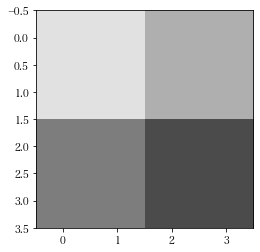

In [22]:
plt.imshow(np.array(im))

In [227]:
data = np.array(im)

In [208]:
corner_tuples

[(1, 1), (2, 1), (2, 2), (1, 2)]

In [198]:
type(im)

PIL.Image.Image

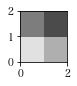

In [169]:
fig = show_colors(colors, locations);

In [170]:
data = fig2arr(fig)

In [173]:
data.shape

(72, 72, 3)

In [7]:
data = fig_to_array(fig)

In [8]:
data.shape

(288, 432, 4)

In [9]:
r = data[:, :, 0]

In [10]:
r.shape

(288, 432)

In [11]:
r[50:52, 50:52]

array([[125, 125],
       [125, 125]], dtype=uint8)

In [12]:
r[50:52, 250:252]

array([[75, 75],
       [75, 75]], dtype=uint8)

In [13]:
r[250:252, 50:52]

array([[225, 225],
       [225, 225]], dtype=uint8)

In [14]:
r[250:252, 250:252]

array([[175, 175],
       [175, 175]], dtype=uint8)

In [15]:
print(colors)

   (0, 0)  (0, 1)  (1, 0)  (1, 1)
r     225     125     175      75
g     225     125     175      75
b     225     125     175      75


In [20]:
color_dict = mat2coldict(colors)
location_dict = mat2coldict(locations)

In [22]:
for top_left_point in sorted(color_dict):
    # color
    color = color_dict[top_left_point]
    hex_color = rgb_to_hex(color)

    # 4 points
    corner_index = four_corners(*top_left_point)
    corners = [location_dict[corner] for corner in corner_index]
    x, y, u = corners_to_list(corners)
    break

In [24]:
x, y, u

([0, 1, 1, 0], [0, 0, 1, 1], [1, 1, 1, 1])

In [23]:
corners

[Vec(self.D, {'u': 1}),
 Vec(self.D, {'x': 1, 'u': 1}),
 Vec(self.D, {'x': 1, 'y': 1, 'u': 1}),
 Vec(self.D, {'y': 1, 'u': 1})]

<ipython-input-111-800c7a81bfa2>:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout(pad=0)


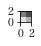

In [111]:
color_dict = mat2coldict(colors)
location_dict = mat2coldict(locations)

fig, ax = plt.subplots(figsize=(.2, .2))
plt.tight_layout(pad=0)
plt.margins(x=0, y=0)
# ax.set_aspect('equal')
for top_left_point in sorted(color_dict):
    # color
    color = color_dict[top_left_point]
    hex_color = rgb_to_hex(color)

    # 4 points
    corner_index = four_corners(*top_left_point)
    corners = [location_dict[corner] for corner in corner_index]
    x, y, u = corners_to_list(corners)
    ax.fill(x, y, color=hex_color)

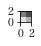

In [144]:
fig

In [164]:
import io
def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    with io.BytesIO() as buf:
        fig.savefig(buf)
        buf.seek(0)
        img = Image.open(buf).convert('RGB')
        return np.array(img)

In [166]:
img = fig2img(fig)

In [ ]:
data = fig_to_array(fig)

In [122]:
np.array(Image.fromarray(data).convert('RGB'))[0]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [123]:
np.array(Image.fromarray(data).convert('RGB'))[1]

array([[ 0,  0,  0],
       [ 0,  0,  0],
       [ 6,  6,  6],
       [25, 25, 25],
       [25, 25, 25],
       [25, 25, 25],
       [25, 25, 25],
       [16, 16, 16],
       [15, 15, 15],
       [15, 15, 15],
       [15, 15, 15],
       [15, 15, 15],
       [15, 15, 15],
       [ 0,  0,  0]], dtype=uint8)

In [124]:
np.array(Image.fromarray(data).convert('RGB'))[2]

array([[255, 255, 255],
       [255, 255, 255],
       [ 25,  25,  25],
       [125, 125, 125],
       [125, 125, 125],
       [125, 125, 125],
       [125, 125, 125],
       [ 75,  75,  75],
       [ 75,  75,  75],
       [ 75,  75,  75],
       [ 75,  75,  75],
       [ 75,  75,  75],
       [ 75,  75,  75],
       [  0,   0,   0]], dtype=uint8)

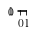

In [69]:
fig, ax = plt.subplots(figsize=(.3, .3))
plt.tight_layout(pad=0)

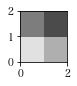

In [83]:
fig

In [ ]:
fig.savefig

In [100]:
import io
with io.BytesIO() as buf:
    fig.savefig(buf, format='png')
    buf.seek(0)
    # im = Image.open(buf)
    im = plt.imread(buf)

In [127]:
from PIL import Image, ImageDraw

In [133]:
im = Image.new(mode='RGB', size=(12, 12))


In [136]:
np.array(im).shape

(12, 12, 3)

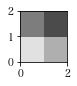

In [85]:
fig

In [113]:
data = fig_to_array(fig)

In [114]:
data.shape

(14, 14, 4)

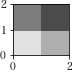

In [68]:
Image.fromarray(data)

In [57]:
color

Vec(self.D, {'g': 125, 'b': 125, 'r': 125})

In [60]:
hex_color

'#7d7d7d'

In [90]:
corners = mat2rowdict(listlist2mat([[0, 1, 1], [1, 0, 1]], cols=["x", "y", "u"]))

In [91]:
corners

{0: Vec(self.D, {'y': 1, 'u': 1}), 1: Vec(self.D, {'x': 1, 'u': 1})}

In [7]:
[(x, y) for x, y in itertools.product(range(3), range(3))]

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

In [24]:
input_list = [
    [0, 0, 0, 1, 1, 1, 2, 2, 2, ],
    [0, 1, 2, 0, 1, 2, 0, 1, 2, ],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, ],
]

In [40]:
numbers = ["000111222", '012'*3,'1'*9]
[ [int(c) for c in number] for number in numbers]

[[0, 0, 0, 1, 1, 1, 2, 2, 2],
 [0, 1, 2, 0, 1, 2, 0, 1, 2],
 [1, 1, 1, 1, 1, 1, 1, 1, 1]]

In [33]:
strings

['000111222', '012012012', '111111111']

In [50]:
color = listlist2mat(
    [[225, 125, 175, 75] for _ in range(3)],
    rows=["b", "g", "r"],
    cols=[(x, y) for x, y in itertools.product(range(2), range(2))],
)

In [51]:
print(color)

   (0, 0)  (0, 1)  (1, 0)  (1, 1)
b     225     125     175      75
g     225     125     175      75
r     225     125     175      75


In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
file = plt.imread('0.png')

In [56]:
file.shape  # rgb

(238, 238, 4)

In [60]:
r,g,b,_ = file

ValueError: too many values to unpack (expected 4)

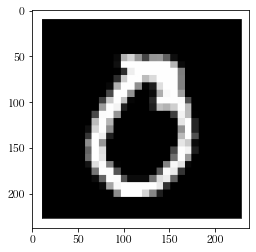

In [58]:
plt.imshow(file)

In [29]:
[
 [int(c) for c in "000111222"],
 [int(c) for c in "012"*3],
 [int(c) for c in "1" * 9],
]
 

[0, 0, 0, 1, 1, 1, 2, 2, 2]

In [25]:
A = listlist2mat(
    input_list,
    rows=["x", "y", "u"],
    cols=[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)],
)

In [26]:
print(A)

   (0, 0)  (0, 1)  (0, 2)  (1, 0)  (1, 1)  (1, 2)  (2, 0)  (2, 1)  (2, 2)
x       0       0       0       1       1       1       2       2       2
y       0       1       2       0       1       2       0       1       2
u       1       1       1       1       1       1       1       1       1


Signature: isinstance(obj, class_or_tuple, /)
Docstring:
Return whether an object is an instance of a class or of a subclass thereof.

A tuple, as in ``isinstance(x, (A, B, ...))``, may be given as the target to
check against. This is equivalent to ``isinstance(x, A) or isinstance(x, B)
or ...`` etc.
Type:      builtin_function_or_method


In [3]:
ord('a')

97

In [4]:
ord('A')

65

In [5]:
ord(' ')

32

In [8]:
s = ''.join([chr(i) for i in range(256)])
print(s)

 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿ


In [11]:
a = str2bits(s)

In [13]:
print(bits2str(a))

 	
 !"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~ ¡¢£¤¥¦§¨©ª«¬­®¯°±²³´µ¶·¸¹º»¼½¾¿ÀÁÂÃÄÅÆÇÈÉÊËÌÍÎÏÐÑÒÓÔÕÖ×ØÙÚÛÜÝÞßàáâãäåæçèéêëìíîïðñòóôõö÷øùúûüýþÿ


In [14]:
word = 'string'

In [15]:
bits = str2bits(word)

In [17]:
p = bits2mat(bits)

In [19]:
print(p)

  0  1  2  3  4  5  6  7  8  9  10 11
0  1  1  0  1  0  1  1  0  0  0  1  0
1  1  1  0  1  1  1  0  1  1  1  1  1
2  0  1  1  1  0  1  0  1  1  1  1  1
3  0  0  0  0  0  0  1  0  1  0  0  0


In [21]:
b_bits = mat2bits(p)

In [22]:
bits2str(b_bits)

'string'

In [24]:
sentence = """I'm trying to free your mind, Neo. But I can only show you the door. You're the one that has to walk through it."""

In [29]:
P = bits2mat(str2bits(sentence))

In [30]:
print(P)

  0   1   2   3   4   5    6   7   8   9   10  11  12  13  14  15  16  17  18  19   20  21  22  23  24  25   26  27  28  29  30  31  32  33  34  35   36  37  38  39  40  41  42  43  44  45   46  47  48  49  50  51  52  53  54  55  56  57   58  59  60  61  62  63  64  65  66  67   68  69  70  71  72  73  74  75   76  77  78  79   80  81  82  83  84  85  86  87   88  89  90  91  92  93  94  95  96  97   98  99  100 101 102 103 104 105 106 107  108 109 110 111 112 113 114 115  116 117 118 119 120 121 122 123  124 125 126 127 128 129 130 131 132 133 134 135  136 137 138 139 140 141 142 143 144 145 146 147 148 149  150 151 152 153 154 155 156 157  158 159 160 161 162 163 164 165  166 167 168 169 170 171 172 173 174 175  176 177 178 179 180 181 182 183  184 185 186 187 188 189  190 191 192 193 194 195 196 197 198 199  200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215  216 217 218 219 220 221 222 223
0   1   0   1   0   1   0    0   0   0   1   0   1   1   1   1   0   0   0   1 

In [33]:
E = noise(P, .02)

In [35]:
bits2str(mat2bits(E+P))

"I'm trying to`free your mind, Neo. But I can only show you The door. You%re the one tèat has tg ualk(tirough it."

In [58]:
P.shape

(4, 224)

In [45]:
G = listlist2mat([
    [one, 0, one, one],
    [one, one, 0, one],
    [0, 0, 0, one],
    [one, one, one, 0],
    [0, 0, one, 0],
    [0, one, 0, 0],
    [one, 0, 0, 0],
])

In [46]:
G.shape

(7, 4)

In [48]:
C = G * P

In [49]:
C.shape

(7, 224)

In [50]:
E = noise(C, .02)

In [128]:
def change_error_rate(C, error_rate):
    E = noise(C, error_rate)
    C_tilde = C + E
    message_made = correct(C_tilde)
    # want to see 224 sums
    coldict = mat2coldict(E)
    num_errors = pd.Series([vec.non_null() for vec in coldict.values()]).value_counts()
    return bits2str(mat2bits(message_made)), num_errors

In [129]:
np.linspace(0, .1, 11)

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [130]:
for error_rate in np.linspace(0, .1, 11):
    print(error_rate, change_error_rate(C, error_rate))

0.0 ("I'm trying to free your mind, Neo. But I can only show you the door. You're the one that has to walk through it.", 0    224
dtype: int64)
0.01 ("I'm trying to free your mind, Neo. But I can only show you the door. You're the one that has to walk through it.", 0    205
1     19
dtype: int64)
0.02 ("I'm tr{ing to free your mind, Neo. But I can only show`you the door. You're the one that has to walk through it.", 0    189
1     33
2      2
dtype: int64)
0.03 ("I'm trying to free yo{r mind, Ngo. Lut I can only show you the door. You're the one that(has to walk through iT.", 0    175
1     44
2      5
dtype: int64)
0.04 ("I'm tryiNg to frne*your iind, Neo. But I mag only sh/w you the(door. You're the one that has to\x10walk $èroug` it.", 0    160
1     52
2     10
3      2
dtype: int64)
0.05 ("Igm trzing to frfe your mind, Nmo. But I can only show you the door. You're the on\x85 that `as t/ ralk thâou7h it.", 0    159
1     55
2     10
dtype: int64)
0.06 ("I'm trying to free your mind

In [131]:
E.shape

(7, 224)

In [118]:
# want to see 224 sums
coldict = mat2coldict(E)
pd.Series([vec.non_null() for vec in coldict.values()]).value_counts()

0    194
1     28
2      2
dtype: int64

In [51]:
C_tilde = C + E

In [53]:
H = listlist2mat([
    [0, 0, 0, one, one, one, one],
    [0, one, one, 0, 0, one, one],
    [one, 0, one, 0, one, 0, one],
])

In [64]:
R = listlist2mat([
    [0, 0, 0, 0, 0, 0, one],
    [0, 0, 0, 0, 0, one, 0],
    [0, 0, 0, 0, one, 0, 0],
    [0, 0, one, 0, 0, 0, 0],
])

In [65]:
R.shape

(4, 7)

In [55]:
C_tilde.shape

(7, 224)

In [66]:
bits2str(mat2bits(R * C_tilde))

'I\x0fm trqifg to free"your mind, Neo.`But I can ojly\x02show\x00xou tHe door, You\'ra thE one ôhat has tO walk T(rough$it.'

In [103]:
from coding_the_matrix.hamming import correct

In [105]:
message_made = correct(C_tilde)

In [106]:
bits2str(mat2bits(message_made))

"I'm trping to free your mind, Neo. But I can only show you tXe door. You're the one that has to walk through it."

In [68]:
A = C_tilde.copy()

In [72]:
from coding_the_matrix.hamming import find_error_matrix

In [75]:
A.shape

(7, 224)

In [82]:
decoded_matrix = H * A

In [84]:
decoded_matrix.shape

(3, 224)

In [86]:
error_matrix = find_error_matrix(decoded_matrix)

In [87]:
error_matrix.shape

(7, 224)

In [93]:
corrected_matrix = A - error_matrix

In [99]:
message_matrix = R * corrected_matrix

In [101]:
bits2str(mat2bits(message_matrix))

"I'm trping to free your mind, Neo. But I can only show you tXe door. You're the one that has to walk through it."

In [95]:
print(bits2str(mat2bits(corrected_matrix)))

Ì^UT¼
À3g´~Peðÿ@5©ðÒtP1ñÿ¯ÂTÕsFef@EËHgÿMP©2R|P13 Ux¶Ñf ÕFyfL<@ÆfÿP1ñÿPeð©tPefÿÙ¦ÂÓT SúIñx
/Tüa&Tÿm&Tüa¶eð Õa¶ñ UÿTxüræg U©ðÿf sÁÓT


In [ ]:
A_tilda = A - 

In [6]:
message = list2vec([one, 0, 0, one])

In [11]:
encoded = (G * message)

In [13]:
encoded.f.values()

dict_values([0, 0, 1, 1, 0, 0, 1])

In [10]:
(G * list2vec([0, 0, 1, 1])).f.values()

dict_values([0, 1, 1, 1, 1, 0, 0])

In [26]:
R = listlist2mat([
    [0, 0, 0, 0, 0, 0, one],
    [0, 0, 0, 0, 0, one, 0],
    [0, 0, 0, 0, one, 0, 0],
    [0, 0, one, 0, 0, 0, 0],
])

In [27]:
encoded

Vec(self.D, {2: 1, 3: 1, 6: 1})

In [28]:
message

Vec(self.D, {0: 1, 3: 1})

In [29]:
R * encoded

Vec(self.D, {0: 1, 3: 1})

In [32]:
print(R*G)

   0  1  2  3
0  1  0  0  0
1  0  1  0  0
2  0  0  1  0
3  0  0  0  1


In [73]:
H = listlist2mat([
    [0, 0, 0, one, one, one, one],
    [0, one, one, 0, 0, one, one],
    [one, 0, one, 0, one, 0, one],
])

In [74]:
print(H * G)

   0  1  2  3
0  0  0  0  0
1  0  0  0  0
2  0  0  0  0


In [40]:
e = list2vec([0, 0, 0, 0, 0, 0, 1])

In [42]:
zeros = [0 for i in range(7)]

In [45]:
E = []
for i in range(7):
    zeros = [0 for i in range(7)]
    zeros[i] = 1
    E.append(zeros.copy())

In [49]:
print(H * listlist2mat(E))

   0  1  2  3  4  5  6
0  0  0  0  1  1  1  1
1  0  1  1  0  0  1  1
2  1  0  1  0  1  0  1


In [105]:
def find_error(error_syndrome):
    coldict = mat2coldict(H)
    for i, col in coldict.items():
        if error_syndrome == col:
            zeros = [0 for i in range(7)]
            zeros[i] = one
            return list2vec(zeros)

In [41]:
H * e

Vec(self.D, {0: 1, 1: 1, 2: 1})

In [86]:
message = list2vec([one, 0, one, one, 0, one, one])

In [87]:
len(message)

7

In [91]:
error_syndrome = H * message

In [137]:
error_syndrome

Vec(self.D, {0: 1, 1: 1, 2: 1})

In [99]:
H

Mat(({0, 1, 2}, {0, 1, 2, 3, 4, 5, 6}), {(0, 0): 0, (0, 1): 0, (0, 2): 0, (0, 3): 1, (0, 4): 1, (0, 5): 1, (0, 6): 1, (1, 0): 0, (1, 1): 1, (1, 2): 1, (1, 3): 0, (1, 4): 0, (1, 5): 1, (1, 6): 1, (2, 0): 1, (2, 1): 0, (2, 2): 1, (2, 3): 0, (2, 4): 1, (2, 5): 0, (2, 6): 1})

In [106]:
e = find_error(error_syndrome)
e

Vec(self.D, {6: 1})

In [108]:
clean_message = message + e

In [110]:
print(R * clean_message)

0 1 2 3
0 1 0 1


In [136]:
def find_error_matrix(S):
    """
    Args:
        S: columns are error syndromes
    Returns:
        a matrix whose column is the error coressponding to the column of S
    """
    coldict = mat2coldict(S)
    errors = {k: find_error(v) for k, v in coldict.items()}
    return coldict2mat(errors)

In [151]:
M = listlist2mat(
    [
        [
            one,
            one,
            one,
        ],
        [0, 0, one],
    ]
).transpose()

In [144]:
print(M)

   0  1
0  1  0
1  1  0
2  1  1


In [145]:
coldict = mat2coldict(M)

In [149]:
EM = find_error_matrix(M)

In [150]:
print(EM)

   0  1
0  0  1
1  0  0
2  0  0
3  0  0
4  0  0
5  0  0
6  1  0


In [22]:
A = Mat(
    (
        {'a', 'b', 'c'}, {'#', '@', '?'}
    ),
    {
        ('a', '#'): 2,
        ('a', '?'): 3,
        ('b', '@'): 10,
        ('b', '#'): 20,
        ('b', '?'): 30,
        ('c', '#'): 35,
    }
)

In [23]:
print(A)

    #   ?   @
a   2   3   0
c  35   0   0
b  20  30  10


In [24]:
A.pprint(['b', 'a', 'c'], ['@', '?', '#'])

,@,?,#
b,10,30,20
a,0,3,2
c,0,0,35


In [88]:
def is_triangular(M):
    R_orig, C_orig = M.D
    # for a certain R -> C mapping
    for R, C in tqdm(itertools.product(itertools.permutations(R_orig), itertools.permutations(C_orig))):
        # if f == 0 for all j > i, return True
        if all(
            [
                M[(R[i], C[j])] == 0
                for (i, j) in itertools.product(range(len(R)), range(len(C)))
                if i > j
            ]
        ):
            return True, R, C
    return False, None, None

In [89]:
is_triangular(M)

29it [00:00, 137440.47it/s]


(True, ('b', 'a', 'c'), ('@', '?', '#'))

In [85]:
C = ['@', '?', '#'] 
C = ['?', '@', '#']

In [86]:
R = ['b', 'a', 'c']
R = ['a', 'b', 'c']

In [87]:
all([M[(R[i], C[j])] == 0 for (i, j) in itertools.product(range(len(R)), range(len(C))) if i > j])

False

In [84]:
[c for c in itertools.permutations(C)]

[('@', '?', '#'),
 ('@', '#', '?'),
 ('?', '@', '#'),
 ('?', '#', '@'),
 ('#', '@', '?'),
 ('#', '?', '@')]

In [66]:
M

Mat(({'a', 'c', 'b'}, {'#', '?', '@'}), {('a', '#'): 2, ('a', '?'): 3, ('b', '@'): 10, ('b', '#'): 20, ('b', '?'): 30, ('c', '#'): 35})

In [67]:
is_triangular(M)

6it [00:00, 12342.24it/s]


(False, None, None)

In [30]:
M = A.copy()

In [31]:
R, C = M.D

In [34]:
R = sorted(list(R))

In [36]:
C = sorted(list(C))

In [40]:
[c for c in itertools.permutations(C)]

[('#', '?', '@'),
 ('#', '@', '?'),
 ('?', '#', '@'),
 ('?', '@', '#'),
 ('@', '#', '?'),
 ('@', '?', '#')]

In [43]:
R, C

(['a', 'b', 'c'], ['#', '?', '@'])

In [55]:
if all(
    [
        M[(R[i], C[j])] == 0
        for (i, j) in itertools.product(range(len(R)), range(len(C)))
        if j > i
    ]
):
    return True

False

In [51]:
M[('a', '@')]

0

In [25]:
A

Mat(({'a', 'c', 'b'}, {'#', '?', '@'}), {('a', '#'): 2, ('a', '?'): 3, ('b', '@'): 10, ('b', '#'): 20, ('b', '?'): 30, ('c', '#'): 35})

In [2]:
D = {'radio', 'sensor', 'memory', 'CPU'}
v0 = Vec(D, {'radio': .1, 'CPU': .3})
v1 = Vec(D, {'sensor': .2, 'CPU': .4})
v2 = Vec(D, {'memory': .3, 'CPU': .1})
v3 = Vec(D, {'memory': .5, 'CPU': .4})
v4 = Vec(D, {'radio': .2, 'CPU': .5})

In [10]:
b = Vec(set(range(5)), {0: 140., 1: 170., 2: 60., 3: 170., 4:250.})

In [4]:
A = rowdict2mat([v0, v1, v2, v3, v4])

In [6]:
print(A)

   CPU  radio  memory  sensor
0  0.3    0.1     0.0     0.0
1  0.4    0.0     0.0     0.2
2  0.1    0.0     0.3     0.0
3  0.4    0.0     0.5     0.0
4  0.5    0.2     0.0     0.0


In [12]:
rate = solve(A, b)

AssertionError: 

In [13]:
b.D

{0, 1, 2, 3, 4}

In [16]:
A.D[0] == b.D

True

In [2]:
A = listlist2mat([[10, 20, 30, 40], [50, 60, 70, 80]])

In [3]:
print(A)

    0   1   2   3
0  10  20  30  40
1  50  60  70  80


In [4]:
def mat2Vec(M):
    R, C = M.D
    return Vec({(r,c) for r in R for c in C}, M.f) 

In [5]:
def tranpose(M):
    R, C = M.D
    D = (C, R)
    f = {(c, r): v for (r, c), v in M.f.items()}
    return Mat(D, f)

In [6]:
print(tranpose(A))

    0   1
0  10  50
1  20  60
2  30  70
3  40  80


In [7]:
def button_vectors(n):
    D = {(x, y) for x, y in itertools.product(range(n), range(n))}
    vecdict = {
        (i, j): Vec(
            D,
            dict([((x, j), one) for x in range(max(i - 1, 0), min(i + 2, n))]+
            [((i, y), one) for y in range(max(j - 1, 0), min(j + 2, n))]),
        )
        for (i, j) in D
    }
    return vecdict

In [10]:
vectors = button_vectors(5)

In [11]:
b = value(vectors)

In [12]:
s = Vec(b.D, {(2, 2): one})

In [13]:
M = rowdict2mat(vectors)

In [33]:
sol, A = solve(M, s)

ERROR:coding_the_matrix.solve:rowvec=Vec({(4, 0), (3, 4), (4, 3), (3, 1), (0, 2), (2, 2), (1, 0), (1, 3), (4, 2), (3, 0), (3, 3), (0, 1), (2, 4), (1, 2), (0, 4), (2, 1), (3, 2), (4, 1), (4, 4), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4), (2, 3)}, {(4, 0): 0, (3, 4): 0, (4, 3): 0, (3, 1): 0, (0, 2): 0, (2, 2): 0, (1, 0): 0, (1, 3): 0, (4, 2): 0, (3, 0): 0, (3, 3): 0, (0, 1): 0, (2, 4): 0, (1, 2): 0, (0, 4): 0, (2, 1): 0, (3, 2): 0, (4, 1): 0, (4, 4): 0, (0, 0): 0, (1, 1): 0, (0, 3): 0, (2, 0): 0, (1, 4): 0, (2, 3): 0}) has zero at col=(1, 4)
ERROR:coding_the_matrix.solve:rowvec=Vec({(4, 0), (3, 4), (4, 3), (3, 1), (0, 2), (2, 2), (1, 0), (1, 3), (4, 2), (3, 0), (3, 3), (0, 1), (2, 4), (1, 2), (0, 4), (2, 1), (3, 2), (4, 1), (4, 4), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4), (2, 3)}, {(4, 0): 0, (3, 4): 0, (4, 3): 0, (3, 1): 0, (0, 2): 0, (2, 2): 0, (1, 0): 0, (1, 3): 0, (4, 2): 0, (3, 0): 0, (3, 3): 0, (0, 1): 0, (2, 4): 0, (1, 2): 0, (0, 4): 0, (2, 1): 0, (3, 2): 0, (4, 1): 0, (4, 4): 0, (0, 

In [41]:
len([(k, v) for k, v in A.f.items() if v != 0])

45

In [42]:
[(k, v) for k, v in A.f.items() if v != 0]

[(((4, 3), (0, 3)), 1),
 (((4, 3), (2, 3)), 1),
 (((3, 1), (2, 0)), 1),
 (((3, 1), (2, 3)), 1),
 (((0, 2), (1, 1)), 1),
 (((2, 2), (4, 4)), 1),
 (((2, 2), (1, 4)), 1),
 (((2, 2), (2, 3)), 1),
 (((1, 0), (4, 1)), 1),
 (((1, 0), (2, 3)), 1),
 (((1, 3), (3, 2)), 1),
 (((1, 3), (1, 4)), 1),
 (((4, 2), (0, 0)), 1),
 (((4, 2), (1, 4)), 1),
 (((4, 2), (2, 3)), 1),
 (((3, 0), (2, 4)), 1),
 (((3, 0), (2, 3)), 1),
 (((3, 3), (2, 1)), 1),
 (((3, 3), (2, 3)), 1),
 (((0, 1), (0, 1)), 1),
 (((0, 1), (2, 3)), 1),
 (((2, 4), (4, 3)), 1),
 (((2, 4), (2, 3)), 1),
 (((1, 2), (3, 3)), 1),
 (((0, 4), (0, 4)), 1),
 (((0, 4), (1, 4)), 1),
 (((0, 4), (2, 3)), 1),
 (((2, 1), (4, 2)), 1),
 (((2, 1), (1, 4)), 1),
 (((3, 2), (3, 1)), 1),
 (((4, 1), (4, 0)), 1),
 (((4, 1), (1, 4)), 1),
 (((4, 1), (2, 3)), 1),
 (((4, 4), (3, 4)), 1),
 (((4, 4), (1, 4)), 1),
 (((0, 0), (1, 2)), 1),
 (((0, 0), (1, 4)), 1),
 (((1, 1), (3, 0)), 1),
 (((1, 1), (1, 4)), 1),
 (((0, 3), (0, 2)), 1),
 (((0, 3), (1, 4)), 1),
 (((2, 0), (1, 0

In [32]:
M*sol == s

False

In [10]:
value(vectors)

Vec({(4, 0), (3, 4), (4, 3), (3, 1), (0, 2), (2, 2), (1, 0), (1, 3), (4, 2), (3, 0), (3, 3), (0, 1), (2, 4), (1, 2), (0, 4), (2, 1), (3, 2), (4, 1), (4, 4), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4), (2, 3)}, {(3, 0): 1, (4, 0): 1, (4, 1): 1})

In [11]:
keys(vectors)

dict_keys([(4, 0), (3, 4), (4, 3), (3, 1), (0, 2), (2, 2), (1, 0), (1, 3), (4, 2), (3, 0), (3, 3), (0, 1), (2, 4), (1, 2), (0, 4), (2, 1), (3, 2), (4, 1), (4, 4), (0, 0), (1, 1), (0, 3), (2, 0), (1, 4), (2, 3)])

In [12]:
len(vectors)

25

In [13]:
b = vectors[(0, 0)]

In [14]:
dict([(4, 3)] + [(4, 1)])

{4: 1}

In [15]:
B = coldict2mat(button_vectors(5))

In [16]:
s = Vec(b.D, {(2, 2): one})

## Gnome

In [17]:
D = {'metal', 'concrete', 'plastic', 'water', 'electricity'}
v_gnome = Vec(D, {'concrete': 1.3, 'plastic': .2, 'water': .8, 'electricity': .4})
v_hoop = Vec(D, {'plastic': 1.5, 'water': .4, 'electricity': .3})
v_slinky = Vec(D, {'metal': .25, 'water': .2, 'electricity': .7})
v_putty = Vec(D, {'plastic': .3, 'water': .7, 'electricity': .5})
v_shooter = Vec(D, {'metal': .15, 'plastic': .5, 'water': .4, 'electricity': .8})

In [18]:
240*v_gnome + 55 * v_hoop

Vec({'water', 'concrete', 'plastic', 'metal', 'electricity'}, {'concrete': 312.0, 'plastic': 130.5, 'electricity': 112.5, 'water': 214.0})

In [19]:
rowdict = {
    'gnome': v_gnome,
    'hoop': v_hoop,
    'slinky': v_slinky,
    'putty': v_putty,
    'shooter': v_shooter,
}

In [20]:
M = rowdict2mat(rowdict)

In [21]:
print(M)

         water  concrete  plastic  metal  electricity
slinky     0.2       0.0      0.0   0.25          0.7
hoop       0.4       0.0      1.5   0.00          0.3
putty      0.7       0.0      0.3   0.00          0.5
gnome      0.8       1.3      0.2   0.00          0.4
shooter    0.4       0.0      0.5   0.15          0.8


In [22]:
R = set(rowdict.keys())

In [23]:
C = M.D[1]

In [24]:
u = Vec(R, {'putty': 133, 'gnome': 240, 'slinky': 150, 'hoop': 55, 'shooter': 90})

In [25]:
M.D

({'gnome', 'hoop', 'putty', 'shooter', 'slinky'},
 {'concrete', 'electricity', 'metal', 'plastic', 'water'})

Vec(M.D[1], {k: u * vec for k, vec in mat2coldict(M).items()})

In [26]:
u.D

{'gnome', 'hoop', 'putty', 'shooter', 'slinky'}

In [27]:
isinstance(M, Mat)

True

In [28]:
u * M

Vec({'water', 'concrete', 'plastic', 'metal', 'electricity'}, {'water': 373.1, 'concrete': 312.0, 'plastic': 215.4, 'metal': 51.0, 'electricity': 356.0})

In [29]:
A.D

({0, 1}, {0, 1, 2, 3})

In [30]:
sorted(A.f.keys())

[(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)]

In [31]:
{k: A.f[k] for k in sorted(A.f)}

{(0, 0): 10,
 (0, 1): 20,
 (0, 2): 30,
 (0, 3): 40,
 (1, 0): 50,
 (1, 1): 60,
 (1, 2): 70,
 (1, 3): 80}

In [32]:
sorted([(1, 0), (0, 0), (0, 1)])

[(0, 0), (0, 1), (1, 0)]

In [33]:
A.f.keys()

dict_keys([(0, 0), (0, 1), (0, 2), (0, 3), (1, 0), (1, 1), (1, 2), (1, 3)])

In [34]:
import sys
sys.path.append('../coding_the_matrix/mat')

In [35]:
from coding_the_matrix import solver

ImportError: Unsupported Python version

In [ ]:
solver.solve()

In [36]:
b = Vec({'metal', 'concrete', 'water', 'electricity', 'plastic'}, {'metal': 51.0, 'concrete': 312.0, 'water': 373.1, 'electricity': 356.0, 'plastic': 215.4})

In [37]:
M.transpose()

Mat(({'water', 'concrete', 'plastic', 'metal', 'electricity'}, {'slinky', 'hoop', 'putty', 'gnome', 'shooter'}), {('water', 'gnome'): 0.8, ('concrete', 'gnome'): 1.3, ('plastic', 'gnome'): 0.2, ('metal', 'gnome'): 0, ('electricity', 'gnome'): 0.4, ('water', 'hoop'): 0.4, ('concrete', 'hoop'): 0, ('plastic', 'hoop'): 1.5, ('metal', 'hoop'): 0, ('electricity', 'hoop'): 0.3, ('water', 'slinky'): 0.2, ('concrete', 'slinky'): 0, ('plastic', 'slinky'): 0, ('metal', 'slinky'): 0.25, ('electricity', 'slinky'): 0.7, ('water', 'putty'): 0.7, ('concrete', 'putty'): 0, ('plastic', 'putty'): 0.3, ('metal', 'putty'): 0, ('electricity', 'putty'): 0.5, ('water', 'shooter'): 0.4, ('concrete', 'shooter'): 0, ('plastic', 'shooter'): 0.5, ('metal', 'shooter'): 0.15, ('electricity', 'shooter'): 0.8})

In [38]:
solution = solver.solve(M.transpose(), b)

NameError: name 'solver' is not defined

In [39]:
A = M.transpose()

In [40]:
A

Mat(({'water', 'concrete', 'plastic', 'metal', 'electricity'}, {'slinky', 'hoop', 'putty', 'gnome', 'shooter'}), {('water', 'gnome'): 0.8, ('concrete', 'gnome'): 1.3, ('plastic', 'gnome'): 0.2, ('metal', 'gnome'): 0, ('electricity', 'gnome'): 0.4, ('water', 'hoop'): 0.4, ('concrete', 'hoop'): 0, ('plastic', 'hoop'): 1.5, ('metal', 'hoop'): 0, ('electricity', 'hoop'): 0.3, ('water', 'slinky'): 0.2, ('concrete', 'slinky'): 0, ('plastic', 'slinky'): 0, ('metal', 'slinky'): 0.25, ('electricity', 'slinky'): 0.7, ('water', 'putty'): 0.7, ('concrete', 'putty'): 0, ('plastic', 'putty'): 0.3, ('metal', 'putty'): 0, ('electricity', 'putty'): 0.5, ('water', 'shooter'): 0.4, ('concrete', 'shooter'): 0, ('plastic', 'shooter'): 0.5, ('metal', 'shooter'): 0.15, ('electricity', 'shooter'): 0.8})

In [41]:
b

Vec({'water', 'concrete', 'plastic', 'metal', 'electricity'}, {'metal': 51.0, 'concrete': 312.0, 'water': 373.1, 'electricity': 356.0, 'plastic': 215.4})

In [42]:
rowdict = mat2rowdict(A)

In [43]:
rowdict

{'water': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.2, 'hoop': 0.4, 'putty': 0.7, 'gnome': 0.8, 'shooter': 0.4}),
 'concrete': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0, 'hoop': 0, 'putty': 0, 'gnome': 1.3, 'shooter': 0}),
 'plastic': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0, 'hoop': 1.5, 'putty': 0.3, 'gnome': 0.2, 'shooter': 0.5}),
 'metal': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.25, 'hoop': 0, 'putty': 0, 'gnome': 0, 'shooter': 0.15}),
 'electricity': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.7, 'hoop': 0.3, 'putty': 0.5, 'gnome': 0.4, 'shooter': 0.8})}

In [44]:
b

Vec({'water', 'concrete', 'plastic', 'metal', 'electricity'}, {'metal': 51.0, 'concrete': 312.0, 'water': 373.1, 'electricity': 356.0, 'plastic': 215.4})

In [45]:
b.D

{'concrete', 'electricity', 'metal', 'plastic', 'water'}

In [46]:
R, C = A.D
assert len(R) == len(C)
N = len(R)

In [47]:
R

{'concrete', 'electricity', 'metal', 'plastic', 'water'}

In [48]:
b

Vec({'water', 'concrete', 'plastic', 'metal', 'electricity'}, {'metal': 51.0, 'concrete': 312.0, 'water': 373.1, 'electricity': 356.0, 'plastic': 215.4})

In [92]:
from typing import Tuple
def get_max_row(col, rowdict, used=None) -> Tuple[str, Vec]:
    """get row from rowdict where col is max"""
    rowdict = rowdict.copy()
    if used is not None:
        [rowdict.pop(key) for key in used]
    return sorted(rowdict.items(), key= lambda x: x[1].f[col])[-1]

In [96]:
rowdict

{'water': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.0, 'hoop': 0.0, 'putty': 1.0, 'gnome': 0.0, 'shooter': 0.0}),
 'concrete': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.0, 'hoop': 0.0, 'putty': 0.0, 'gnome': 1.0, 'shooter': 0.0}),
 'plastic': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.0, 'hoop': 1.0, 'putty': 0.0, 'gnome': 0.0, 'shooter': 0.0}),
 'metal': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': -0.0, 'hoop': -0.0, 'putty': -0.0, 'gnome': -0.0, 'shooter': 1.0}),
 'electricity': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 1.0, 'hoop': 0.0, 'putty': 0.0, 'gnome': 0.0, 'shooter': 0.0})}

In [123]:
rowdict = mat2rowdict(A)
b = Vec({'metal', 'concrete', 'water', 'electricity', 'plastic'}, {'metal': 51.0, 'concrete': 312.0, 'water': 373.1, 'electricity': 356.0, 'plastic': 215.4})
upper_triangle = {}  # 結果をいれる

# select col to operate on
for col in C:
    # get row where col is max value
    row, rowvec = get_max_row(col, rowdict, used=upper_triangle.keys())
    # rowdict.pop(row)
    
    # update yourself (to one)
    coef = 1 / rowvec[col]
    rowvec *= coef
    assert rowvec[col] == 1
    b[row] *= coef
    rowdict[row] = rowvec
    
    # iterate over the rows
    for other, othervec in rowdict.items():
        if row == other:
            continue
            
        # coef
        coef = othervec[col]/rowvec[col]

        # update rowvec
        othervec -= coef * rowvec
        rowdict[other] = othervec

        # update b
        b[other] -= coef * b[row]

In [137]:
D = {"metal", "concrete", "plastic", "water", "electricity"}
v_gnome = Vec(
    D, {"concrete": 1.3, "plastic": 0.2, "water": 0.8, "electricity": 0.4}
)
v_hoop = Vec(D, {"plastic": 1.5, "water": 0.4, "electricity": 0.3})
v_slinky = Vec(D, {"metal": 0.25, "water": 0.2, "electricity": 0.7})
v_putty = Vec(D, {"plastic": 0.3, "water": 0.7, "electricity": 0.5})
v_shooter = Vec(
    D, {"metal": 0.15, "plastic": 0.5, "water": 0.4, "electricity": 0.8}
)
rowdict = {
    "gnome": v_gnome,
    "hoop": v_hoop,
    "slinky": v_slinky,
    "putty": v_putty,
    "shooter": v_shooter,
}
M = rowdict2mat(rowdict)
b = Vec(
    {"metal", "concrete", "water", "electricity", "plastic"},
    {
        "metal": 51.0,
        "concrete": 312.0,
        "water": 373.1,
        "electricity": 356.0,
        "plastic": 215.4,
    },
)

In [138]:
from coding_the_matrix.solve import solve

In [139]:
A = M.transpose()
x = solve(A, b)
residual = b - x * M
assert np.isclose(residual * residual, 0)
print(x)

 shooter  gnome  putty  slinky  hoop
    90.0  240.0  133.0   150.0  55.0


In [133]:
row

'electricity'

In [134]:
other

'electricity'

In [131]:
othervec

Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.9999999999999997, 'hoop': 0.0, 'putty': 0.6285714285714283, 'gnome': 0.0, 'shooter': 1.0})

In [132]:
rowvec

Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.9999999999999997, 'hoop': 0.0, 'putty': 0.6285714285714283, 'gnome': 0.0, 'shooter': 1.0})

In [128]:
rowdict

{'water': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': -0.06666666666666665, 'hoop': 0.0, 'putty': 0.4523809523809524, 'gnome': 0.0, 'shooter': 0.0}),
 'concrete': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.0, 'hoop': 0.0, 'putty': 0.0, 'gnome': 1.0, 'shooter': 0.0}),
 'plastic': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': -0.3333333333333332, 'hoop': 1.0, 'putty': -0.009523809523809441, 'gnome': 0.0, 'shooter': 0.0}),
 'metal': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.09999999999999998, 'hoop': 0.0, 'putty': -0.0942857142857143, 'gnome': 0.0, 'shooter': 0.0}),
 'electricity': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.9999999999999997, 'hoop': 0.0, 'putty': 0.6285714285714283, 'gnome': 0.0, 'shooter': 1.0})}

In [127]:
b[row]

323.5999999999999

In [124]:
othervec

Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.9999999999999997, 'hoop': 0.0, 'putty': 0.6285714285714283, 'gnome': 0.0, 'shooter': 1.0})

In [125]:
row

'electricity'

In [113]:
b[row]

323.5999999999999

In [116]:
b[row] *= coef

In [117]:
coef

0.15000000000000008

In [119]:
b[row]

48.54000000000001

In [109]:
rowdict

{'water': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': -0.06666666666666665, 'hoop': 0.0, 'putty': 0.4523809523809524, 'gnome': 0.0, 'shooter': 0.0}),
 'concrete': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.0, 'hoop': 0.0, 'putty': 0.0, 'gnome': 1.0, 'shooter': 0.0}),
 'plastic': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': -0.3333333333333332, 'hoop': 1.0, 'putty': -0.009523809523809441, 'gnome': 0.0, 'shooter': 0.0}),
 'metal': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.09999999999999998, 'hoop': 0.0, 'putty': -0.0942857142857143, 'gnome': 0.0, 'shooter': 0.0}),
 'electricity': Vec({'slinky', 'hoop', 'putty', 'gnome', 'shooter'}, {'slinky': 0.9999999999999997, 'hoop': 0.0, 'putty': 0.6285714285714283, 'gnome': 0.0, 'shooter': 1.0})}

In [110]:
b

Vec({'water', 'concrete', 'plastic', 'metal', 'electricity'}, {'metal': 2.460000000000001, 'concrete': 239.99999999999997, 'water': 50.166666666666714, 'electricity': 323.5999999999999, 'plastic': 3.7333333333333627})

In [95]:
for col in C:
    print(col)

slinky
hoop
putty
gnome
shooter


In [111]:
upper_triangle

{}

In [98]:
M2 = rowdict2mat(upper_triangle)

In [99]:
print(M2)

             slinky      hoop     putty     gnome   shooter
water           0.0  0.000000  1.000000  1.302505  0.134875
metal          -0.0 -0.000000 -0.000000 -0.000000  1.000000
concrete        0.0  0.000000  0.000000  1.000000  0.000000
plastic         0.0  1.000000  0.200000  0.133333  0.333333
electricity     1.0  0.428571  0.714286  0.571429  1.142857


In [100]:
df = M2.to_pandas()

In [101]:
df

,slinky,hoop,putty,gnome,shooter
water,0.0,0.000000,1.000000,1.302505,0.134875
metal,-0.0,-0.000000,-0.000000,-0.000000,1.000000
concrete,0.0,0.000000,0.000000,1.000000,0.000000
plastic,0.0,1.000000,0.200000,0.133333,0.333333
electricity,1.0,0.428571,0.714286,0.571429,1.142857


In [102]:
M2.D[0]

{'concrete', 'electricity', 'metal', 'plastic', 'water'}

In [103]:
df.loc[list(upper_triangle.keys()) , :]

,slinky,hoop,putty,gnome,shooter
electricity,1.0,0.428571,0.714286,0.571429,1.142857
plastic,0.0,1.000000,0.200000,0.133333,0.333333
water,0.0,0.000000,1.000000,1.302505,0.134875
concrete,0.0,0.000000,0.000000,1.000000,0.000000
metal,-0.0,-0.000000,-0.000000,-0.000000,1.000000


In [61]:
b

Vec({'water', 'concrete', 'plastic', 'metal', 'electricity'}, {'metal': -7.092485549132924, 'concrete': 312.0, 'water': 226.25428571428574, 'electricity': 356.0, 'plastic': 215.4})

In [63]:
M2.D

({'concrete', 'electricity', 'metal', 'plastic', 'water'},
 {'gnome', 'hoop', 'putty', 'shooter', 'slinky'})

In [210]:
# coef
coef = othervec[col]/rowvec[col]

# update rowvec
othervec -= coef * rowvec
rowdict[other] = othervec

# update b
b[other] -= coef * b[row]

In [213]:
b

Vec({'metal', 'concrete', 'water', 'electricity', 'plastic'}, {'metal': 51.0, 'concrete': 312.0, 'water': 373.1, 'electricity': 356.0, 'plastic': 215.4})

In [220]:
row, b[row], other, b[other]

('electricity', 356.0, 'metal', 51.0)

In [221]:
coef

0.0

In [219]:
print(A)

             shooter  hoop  putty  slinky  gnome
metal           0.15   0.0    0.0    0.25    0.0
concrete        0.00   0.0    0.0    0.00    1.3
water           0.40   0.4    0.7    0.20    0.8
electricity     0.80   0.3    0.5    0.70    0.4
plastic         0.50   1.5    0.3    0.00    0.2


In [217]:
col

'shooter'

In [211]:
other

'metal'

In [212]:
rowdict

{'metal': Vec({'shooter', 'hoop', 'putty', 'slinky', 'gnome'}, {'shooter': 0.0, 'hoop': -0.05624999999999999, 'putty': -0.09374999999999999, 'slinky': 0.11875000000000002, 'gnome': -0.075}),
 'concrete': Vec({'shooter', 'hoop', 'putty', 'slinky', 'gnome'}, {'shooter': 0, 'hoop': 0, 'putty': 0, 'slinky': 0, 'gnome': 1.3}),
 'water': Vec({'shooter', 'hoop', 'putty', 'slinky', 'gnome'}, {'shooter': 0.4, 'hoop': 0.4, 'putty': 0.7, 'slinky': 0.2, 'gnome': 0.8}),
 'plastic': Vec({'shooter', 'hoop', 'putty', 'slinky', 'gnome'}, {'shooter': 0.5, 'hoop': 1.5, 'putty': 0.3, 'slinky': 0, 'gnome': 0.2})}

In [175]:
rowvec

Vec({'shooter', 'hoop', 'putty', 'slinky', 'gnome'}, {'shooter': 0, 'hoop': 0, 'putty': 0, 'slinky': 0, 'gnome': 1.3})

In [173]:
othervec

Vec({'shooter', 'hoop', 'putty', 'slinky', 'gnome'}, {'shooter': 0.8, 'hoop': 0.3, 'putty': 0.5, 'slinky': 0.7, 'gnome': 0.4})

In [176]:
rowvec[col]

1.3

In [182]:
rowdict

{'concrete': Vec({'shooter', 'hoop', 'putty', 'slinky', 'gnome'}, {'shooter': 0, 'hoop': 0, 'putty': 0, 'slinky': 0, 'gnome': 1.3}),
 'electricity': Vec({'shooter', 'hoop', 'putty', 'slinky', 'gnome'}, {'shooter': 0.8, 'hoop': 0.3, 'putty': 0.5, 'slinky': 0.7, 'gnome': 0.4}),
 'metal': Vec({'shooter', 'hoop', 'putty', 'slinky', 'gnome'}, {'shooter': 0.15, 'hoop': 0, 'putty': 0, 'slinky': 0.25, 'gnome': 0}),
 'plastic': Vec({'shooter', 'hoop', 'putty', 'slinky', 'gnome'}, {'shooter': 0.5, 'hoop': 1.5, 'putty': 0.3, 'slinky': 0, 'gnome': 0.2}),
 'water': Vec({'shooter', 'hoop', 'putty', 'slinky', 'gnome'}, {'shooter': 0.4, 'hoop': 0.4, 'putty': 0.7, 'slinky': 0.2, 'gnome': 0.8})}

In [ ]:
sol

In [ ]:
solver

In [105]:
solver.solve.__code__

<code object solve at 0x16835e150, file "../resources/private/solver.py", line 186>

In [106]:
import inspect

In [108]:
solver.solve?

Signature: solver.solve(A, b, eps=1e-15)
Docstring:
Solve the matrix-vector equation Ax = b.

If a solution to Ax = b does not exist, then the vector returned by
solve(A, b) is not a solution.  Please verify that Ax = b.

Args:
    A: A matrix of type Mat.
    b: A vector of type Vec.
    eps: A threshold.  Optional.

Returns:
    x: A vector of type Vec.

Raises:
    AssertionError: An error occurs when A is not a matrix of type Mat.
    AssertionError: An error occurs when b is not a vector of type Vec.
    AssertionError: An error occurs when A.D[0] != b.D.

Example 1: Solve Ax = b and verify that x is close to b.
>>> from vec import Vec
>>> from mat import Mat
>>> A = mat.Mat(({0, 1, 2}, {0, 1}), {(0, 1): 2, (2, 0): 10, (1, 0): 3, (0, 0): 1, (1, 1): 4})
>>> b = vec.Vec({0, 1, 2},{0: 1, 1: 5, 2: 30})
>>> A.D[0] == b.D
True
>>> x = solve(A, b)
>>> A.D[1] == x.D
True
>>> (b-A*x).is_almost_zero()
True

Example 2: Solve Ax = b and see that x is not a valid solution.
>>> A = mat.Mat(({0,

In [101]:
b

Vec({'metal', 'concrete', 'water', 'electricity', 'plastic'}, {'metal': 51.0, 'concrete': 312.0, 'water': 373.1, 'electricity': 356.0, 'plastic': 215.4})

In [102]:
M.transpose()

Mat(({'metal', 'concrete', 'water', 'electricity', 'plastic'}, {'shooter', 'hoop', 'putty', 'slinky', 'gnome'}), {('concrete', 'gnome'): 1.3, ('concrete', 'hoop'): 0, ('concrete', 'putty'): 0, ('concrete', 'shooter'): 0, ('concrete', 'slinky'): 0, ('electricity', 'gnome'): 0.4, ('electricity', 'hoop'): 0.3, ('electricity', 'putty'): 0.5, ('electricity', 'shooter'): 0.8, ('electricity', 'slinky'): 0.7, ('metal', 'gnome'): 0, ('metal', 'hoop'): 0, ('metal', 'putty'): 0, ('metal', 'shooter'): 0.15, ('metal', 'slinky'): 0.25, ('plastic', 'gnome'): 0.2, ('plastic', 'hoop'): 1.5, ('plastic', 'putty'): 0.3, ('plastic', 'shooter'): 0.5, ('plastic', 'slinky'): 0, ('water', 'gnome'): 0.8, ('water', 'hoop'): 0.4, ('water', 'putty'): 0.7, ('water', 'shooter'): 0.4, ('water', 'slinky'): 0.2})

Vec({'metal', 'concrete', 'water', 'electricity', 'plastic'}, {'metal': 51.0, 'concrete': 312.0, 'water': 373.1, 'electricity': 356.0, 'plastic': 215.4})

In [ ]:
solution

In [ ]:
residual = b - solution * M

In [ ]:
assert residual * residual < 1e-10

In [49]:
print(M)

         metal  concrete  water  electricity  plastic
hoop      0.00       0.0    0.4          0.3      1.5
gnome     0.00       1.3    0.8          0.4      0.2
putty     0.00       0.0    0.7          0.5      0.3
slinky    0.25       0.0    0.2          0.7      0.0
shooter   0.15       0.0    0.4          0.8      0.5


In [ ]:
M.tra

In [50]:
M = coldict2mat({0:Vec({0,1},{0:1,1:2}),1:Vec({0,1},{0:3,1:4})})

In [54]:
b = Vec({0, 1}, {0: 5, 1: 6})

In [57]:
b

Vec({0, 1}, {0: 5, 1: 6})

In [53]:
M.D

({0, 1}, {0, 1})

In [52]:
print(M)

   0  1
0  1  3
1  2  4


In [61]:
rowdict = mat2rowdict(M)

In [62]:
rowdict

{0: Vec({0, 1}, {0: 1, 1: 3}), 1: Vec({0, 1}, {0: 2, 1: 4})}

In [78]:
R = sorted(M.D[0])
C = sorted(M.D[1])

In [80]:
C

[0, 1]

In [79]:
vec = rowdict[R[0]]

In [74]:
vec

Vec({0, 1}, {0: 1, 1: 3})

In [ ]:
# get a vec
# get the domain of the vec
# get a 

In [14]:
import itertools
for r, c in itertools.product(*D):
    print(f"('{r}', '{c}'): ,")

('a', '@'): ,
('a', '#'): ,
('a', '?'): ,
('b', '@'): ,
('b', '#'): ,
('b', '?'): ,


In [7]:
D = ({'a', 'b'}, {'@', '#', '?'})

In [12]:
f = {
    ("a", "@"): 1,
    ("a", "#"): 2,
    ("a", "?"): 3,
    ("b", "@"): 10,
    ("b", "#"): 20,
    ("b", "?"): 30,
}

In [13]:
M = Mat(D, f)

In [31]:
def mat2rowdict(M):
    """return the rowdict representation of M"""
    R, C = M.D
    return {r: Vec(C, {c: M.f[(r, c)] for c in C}) for r in R}

In [32]:
mat2rowdict(M)

{'a': Vec({'@', '#', '?'}, {'@': 1, '#': 2, '?': 3}),
 'b': Vec({'@', '#', '?'}, {'@': 10, '#': 20, '?': 30})}

In [33]:
def mat2coldict(M):
    """return the coldict representation of M"""
    R, C = M.D
    return {c: Vec(R, {r: M.f[(r, c)] for r in R}) for c in C}

In [34]:
mat2coldict(M)

{'@': Vec({'a', 'b'}, {'a': 1, 'b': 10}),
 '#': Vec({'a', 'b'}, {'a': 2, 'b': 20}),
 '?': Vec({'a', 'b'}, {'a': 3, 'b': 30})}